<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW9/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
from pprint import pprint
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [2]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 4.5MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 5.1MB/s ta 0:00:011
  Running setup.py bdist_wheel for kaggle ... done
  Stored in directory: /Users/home/Library/Caches/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Running setup.py bdist_wheel for python-slugify ... done
  Stored in directory: /Users/home/Library/Caches/pip/wheels/11/94/81/312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built kaggle python-slugify


In [11]:
!chmod 600 /Users/home/.kaggle/kaggle.json

In [15]:
envs = json.load(open("/Users/home/.kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [17]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16           9502        290  1.0              
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          10442        217  0.9411765        
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           4487         95  1.0              
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019

In [19]:
!kaggle competitions download -c higgs-boson

100%|█████████████████████████████████████▊| 54.0M/54.3M [00:08<00:00, 8.77MB/s]
100%|██████████████████████████████████████| 54.3M/54.3M [00:08<00:00, 6.93MB/s]


In [23]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
  inflating: training.zip            
  inflating: test.zip                
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   


In [24]:
!unzip training.zip

Archive:  training.zip
  inflating: training.csv            



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [30]:
training = pd.read_csv('training.csv')
training.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [31]:
training.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [36]:
weights = training['Weight'].values
labels = training['Label'].values

In [33]:
columns = ['Weight', 'Label']
higgsdata = training.drop(columns, inplace=False, axis=1)
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [34]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [37]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [38]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [39]:
# leave
from sklearn.model_selection import train_test_split


In [42]:
# split train and test
traindata, testdata, traindata_labels, testdata_labels, traindata_weights, testdata_weights = train_test_split(
    higgsdata, labels, weights, test_size=0.33, random_state=42)


- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [76]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [77]:
gbt = GradientBoostingClassifier()

In [78]:
rf.fit(X=traindata, y=traindata_labels)
gbt.fit(X=traindata, y=traindata_labels)


/Users/home/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [79]:
# rf score on train data
rf.score(X=traindata, y=traindata_labels)

0.987844776119403

In [82]:
# rf score on test data
rf.score(X=testdata, y=testdata_labels)

0.8225090909090909

In [83]:
# gbt score on train
gbt.score(X=traindata, y=traindata_labels)

0.8336417910447761

In [84]:
# gbt score on test
gbt.score(X=testdata, y=testdata_labels)

0.8317818181818182

The Random Forest model got 0.9878 on training set, and 0.8225 on test set. The Gradient Boosting model got 0.8336 on training set and 0.8317 on test set. The RandomForest model is over training. The Gradient Boosting Classifier has a bad performance on both training and test sets. 

- Produce a confusion matrix for each model and compare them


 



In [97]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    
    # create text annotation
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 10.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="grey" if cm[i, j] > thresh else "black")
  

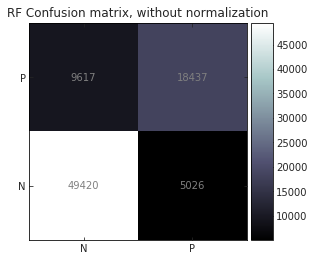

In [98]:
# confusion matrix of RandomForest
y_true = testdata_labels
y_pred = rf.predict(testdata)
plot_confusion_matrix(y_true, y_pred, normalize=False,
                      title='RF',
                      cmap=pl.cm.bone)


Figure 1. The confusion matrix of RandomForestClassifier.

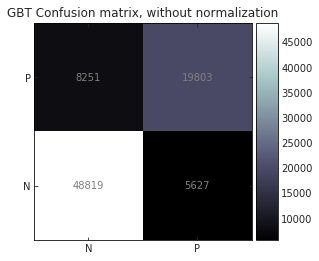

In [99]:
# confusion matrix of GradientBoosting
y_true = testdata_labels
y_pred = gbt.predict(testdata)
plot_confusion_matrix(y_true, y_pred, normalize=False,
                      title='GBT',
                      cmap=pl.cm.bone)


Figure 2. The confusion matrix of the GradientBoostedClassifer.

Figure 1 and Figure 2 show that the RF model has more True Positive than the GBT model on training set, therefore RF model got higher score. 


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rfR = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)

rfR.fit(X=traindata, y=traindata_weights)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [110]:
gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=0)

gbtR.fit(X=traindata.values, y=traindata_weights)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

L2 mean square error, $$L_2 = \sum (y_{true} - y_{pred})^2$$ 
L1 mean absolute error, $$L_1 = \sum |y_{true} - y_{pred}|$$

In [120]:
def loss(y_true, y_pred):
    '''calculate loss functions L1 and L2'''
    L = {}
    L[1] = np.sum( np.abs(y_true - y_pred) )
    L[2] = np.sum( (y_true - y_pred)**2 )
    
    return L
 

In [179]:
y_true = testdata_weights
y_pred_rfR = rfR.predict(testdata)
L = loss(y_true, y_pred_rfR)
print('RF: L1', L[1], 'L2', L[2])

y_pred_gbtR = gbtR.predict(testdata)
L = loss(y_true, y_pred_gbtR)
print('GBT: L1', L[1], 'L2', L[2])


RF: L1 82722.42933606259 L2 150117.35052235983
GBT: L1 69745.7209742055 L2 112203.71988264499


The RandomForestRegressor has larger values of L1 and L2 than GradientBoostingRegressor.



- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [159]:
from sklearn.model_selection import RandomizedSearchCV

In [187]:
# top 4 important features
best_features_index = traindata.columns[ np.argsort(rf.feature_importances_)[::-1] ] [:4]
best_features_index

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'PRI_tau_pt'],
      dtype='object')

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [188]:
higgsdata[best_features_index].head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt
0,138.470,51.655,97.827,32.638
1,160.937,68.768,103.235,42.014
2,-999.000,162.172,125.953,32.154
3,143.905,81.417,80.943,22.647
4,175.864,16.915,134.805,28.209


In [162]:
random_grid = {'max_depth': [3, 10, None], 
               'max_features': ['auto', 'sqrt'],
               'bootstrap': [True, False],
               'n_estimators': [10, 100, 1000] }

In [163]:
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100, 1000]}


In [189]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [191]:
%%time

X = traindata[best_features_index]
y = traindata_labels

random_search.fit(X=X, y=y)

CPU times: user 21min 59s, sys: 6.14 s, total: 22min 5s
Wall time: 22min 13s


In [192]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))


Tuned RF  Parameters: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best score is 0.814411930127174


In [194]:
df = pd.DataFrame(random_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,279.365408,1.544603,6.43783,0.023104,1000,sqrt,10,False,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.816116,0.81262,0.8145,0.814412,0.001429,1,0.827306,0.82918,0.828651,0.828379,0.000789


In [0]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.162951,0.0518,0.103968,0.002995,100,sqrt,3,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.796656,0.79656,0.78728,0.79632,0.792703,0.793904,0.003627,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [217]:
rf = RandomForestClassifier(**random_search.best_params_)
rf.fit(traindata, traindata_labels=='s')


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

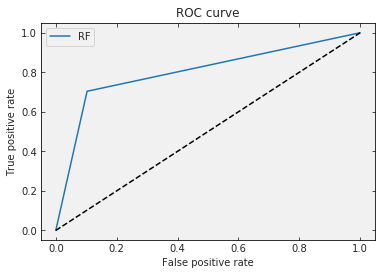

In [230]:
# The random forest model by itself
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(testdata_labels=='s', rf.predict(testdata))
plt.plot(fpr_rf, tpr_rf, label='RF')

# fpr_rf, tpr_rf, _ = roc_curve(testdata_labels=='s', gbt.predict(testdata)=='s')
# plt.plot(fpr_rf, tpr_rf, label='GBT')

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


Figure 3. The ROC curve of RandomForestClassifier. We set three thresholds, therefore we only have three points. But from this simple graph we can still conclude that the RandomForestClassifier is better than a random classifier which is shown as dash line. 

## Submission

In [237]:
# train the best model
rf = RandomForestClassifier(**random_search.best_params_)
rf.fit(traindata, traindata_labels)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [241]:
# create a submission table for the random forest model
submission = pd.DataFrame()
submission['EventId'] = testdata['EventId']
submission['RankOrder'] = np.argsort( rfR.predict(testdata))
submission['Class'] = rf.predict(testdata)
submission.to_csv('submission.csv', index=False)
submission.head()

,EventId,RankOrder,Class
38683,138683,52313,s
64939,164939,15444,b
3954,103954,73534,b
120374,220374,15442,s
172861,272861,60321,b


In [242]:
# create a solution from testdata
solution = pd.DataFrame()
solution['EventId'] = testdata['EventId']
solution['Class'] = testdata_labels
solution['Weight'] = testdata_weights
solution.to_csv('solution.csv', index=False)
solution.head()

,EventId,Class,Weight
38683,138683,b,4.585780
64939,164939,b,5.005938
3954,103954,b,4.747560
120374,220374,s,0.018636
172861,272861,b,4.924326


In [6]:
# the AMS metric provided by kaggle challenge

import os
import csv
import math

def create_solution_dictionary(solution):
    """ Read solution file, return a dictionary with key EventId and value (weight,label).
    Solution file headers: EventId, Label, Weight """
    
    solnDict = {}
    with open(solution, 'rt') as f:
        soln = csv.reader(f)
        #soln.next() # header
        next(soln)
        for row in soln:
            if row[0] not in solnDict:
                solnDict[row[0]] = (row[1], row[2])
    return solnDict

        
def check_submission(submission, Nelements):
    """ Check that submission RankOrder column is correct:
        1. All numbers are in [1,NTestSet]
        2. All numbers are unqiue
    """
    rankOrderSet = set()    
    with open(submission, 'rt') as f:
        sub = csv.reader(f)
        #sub.next() # header
        next(sub)
        for row in sub:
            rankOrderSet.add(row[1])
            
    if len(rankOrderSet) != Nelements:
        print('RankOrder column must contain unique values')
        exit()
    #elif rankOrderSet.isdisjoint(set(xrange(1,Nelements+1))) == False:
    #    print('RankOrder column must contain all numbers from [1..NTestSset]')
    #    exit()
    else:
        return True

    
def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print('radicand is negative. Exiting')
        exit()
    else:
        return math.sqrt(radicand)


def AMS_metric(solution, submission, numEvents):
    """  Prints the AMS metric value to screen.
    Solution File header: EventId, Class, Weight
    Submission File header: EventId, RankOrder, Class
    """
    
    #numEvents = 550000 # number of events = size of test set
    numEvents = numEvents
    # solutionDict: key=eventId, value=(label, class)
    solutionDict = create_solution_dictionary(solution)

    signal = 0.0
    background = 0.0
    if check_submission(submission, numEvents):
        with open(submission, 'rt') as f:
            sub = csv.reader(f)
            #sub.next() # header row
            next(sub)
            for row in sub:
                if row[2] == 's': # only events predicted to be signal are scored
                    if solutionDict[row[0]][0] == 's':
                        signal += float(solutionDict[row[0]][1])
                    elif solutionDict[row[0]][0] == 'b':
                        background += float(solutionDict[row[0]][1])
     
        print( 'signal = {0}, background = {1}'.format(signal, background) )
        print( 'AMS = ' + str(AMS(signal, background)) )


In [7]:
# report the result
numEvents = 82500  # or len(testdata_weights), size of testdata
solutionFile = "solution.csv"
submissionFile = "submission.csv"

AMS_metric(solutionFile, submissionFile, numEvents)

signal = 149.6173235827571, background = 8581.655593007137
AMS = 1.6094971726295126


The RandomForest model achieve an AMS metric value 1.609.